In [1]:
from textblob import TextBlob

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
line = "With Great Power Comes Responsbility"
blob = TextBlob(line)

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
blob.tags

[('With', 'IN'),
 ('Great', 'NNP'),
 ('Power', 'NNP'),
 ('Comes', 'NNP'),
 ('Responsbility', 'NNP')]

In [7]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [8]:
blob.noun_phrases

WordList(['power comes responsbility'])

In [9]:
blob.translate(to="hi")

TextBlob("महान शक्ति के साथ आती है जिम्मेदारी")

In [10]:
blob.translate(to="ko")

TextBlob("큰 힘에는 책임이 따른다")

In [11]:
blob.translate(to="ur")

TextBlob("بڑی طاقت کے ساتھ ذمہ داری آتی ہے۔")

In [12]:
blob.translate(to="es")

TextBlob("Con gran poder viene la responsabilidad")

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('vaccination_tweets.csv')

In [15]:
sentiment = blob.sentiment

In [16]:
sentiment.polarity

0.8

In [17]:
blob2 = TextBlob(df.iloc[0].text)

In [18]:
blob2.sentiment.polarity

0.0

In [19]:
def getsenti(text):
    blob = TextBlob(text)
    pol = blob.sentiment.polarity
    if pol > 0:
        return 'positive'
    elif pol < 0:
        return 'negative' 
    else:
        return 'natural'     

In [20]:
getsenti("Humpty Dumpty sat on a wall")

'natural'

In [21]:
df.text

0        Same folks said daikon paste could treat a cyt...
1        While the world has been on the wrong side of ...
2        #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3        Facts are immutable, Senator, even when you're...
4        Explain to me again why we need a vaccine @Bor...
                               ...                        
11015    The number of Covid-19 cases today, 17 Novembe...
11016                        First dose ✅\n#PfizerBioNTech
11017    The number of Covid-19 cases today, 16 Novembe...
11018    #PfizerBioNTech has developed new pill #Paxlov...
11019    The number of Covid-19 cases today, 15 Novembe...
Name: text, Length: 11020, dtype: object

In [22]:
df.text.map(getsenti)

0         natural
1        negative
2         natural
3        negative
4         natural
           ...   
11015     natural
11016    positive
11017     natural
11018    negative
11019     natural
Name: text, Length: 11020, dtype: object

In [23]:
df.text.apply(getsenti)

0         natural
1        negative
2         natural
3        negative
4         natural
           ...   
11015     natural
11016    positive
11017     natural
11018    negative
11019     natural
Name: text, Length: 11020, dtype: object

In [24]:
df['sentiment'] = df.text.apply(getsenti)

In [25]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,natural
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,natural
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,negative
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False,natural
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False,positive
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False,natural
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False,negative


In [26]:
df.groupby('sentiment').count()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
sentiment,,,,,,,,,,,,,,,,
natural,5218,5218,4074,4852,5218,5218,5218,5218,5218,5218,5218,4204,5218,5218,5218,5218
negative,1134,1134,898,1063,1134,1134,1134,1134,1134,1134,1134,808,1134,1134,1134,1134
positive,4668,4668,3778,4426,4668,4668,4668,4668,4668,4668,4668,3426,4667,4668,4668,4668


In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='id'>

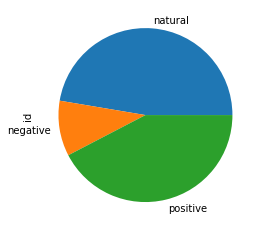

In [28]:
df.groupby('sentiment').count()['id'].plot(kind="pie")

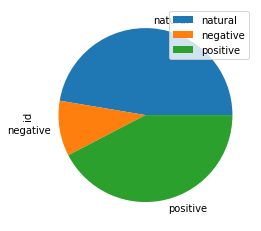

In [29]:
data = df.groupby('sentiment').count()['id']
data.plot(kind="pie")
plt.legend(data.index)
plt.show()